# 1. Introduction

## 1.1. Project Overview

This project focuses on analyzing public sentiment from Tweets regarding Apple and Google products. The main goal is to build a Natural Language Processing (NLP) model that can classify the sentiment of a Tweet as positive, negative, or neutral based on its content.

The data, sourced from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions), contains over 9,000 Tweets labeled by human raters. By analyzing this data, the model will help Apple and Google better understand customer perceptions of their products, allowing them to make informed decisions for marketing, customer service, and product development.

We will begin by preprocessing the Tweets, transforming them into a numerical format suitable for machine learning models, and training several classification algorithms to evaluate their performance.


## 1.2. Business Problem & Stakeholder

### Business Problem:
Public perception of tech products can heavily influence a company's sales, customer satisfaction, and brand loyalty. For companies like Apple and Google, understanding how customers feel about their products can provide valuable insights into areas for improvement, marketing strategies, and product development. 

In this project, we aim to develop a model that automatically classifies the sentiment of Tweets regarding Apple and Google products as positive, negative, or neutral. This can help companies quickly gauge public sentiment at scale, providing actionable insights for decision-making.

### Stakeholders:
- **Apple and Google Product Teams:** Use sentiment data to improve products and address customer pain points.
- **Marketing Departments:** Tailor campaigns to target sentiment-driven messaging.
- **Customer Support Teams:** Identify negative feedback more quickly to address concerns.
- **Executives/Decision Makers:** Gain a high-level view of public opinion, enabling better strategic planning.


## 1.3. Dataset Description

The dataset used in this project comes from [CrowdFlower](https://data.world/crowdflower/brands-and-product-emotions), containing over 9,000 Tweets. Each Tweet has been labeled by human raters with one of three sentiment categories: positive, negative, or neither. The dataset contains the following key columns:

### Key Features of the Dataset:
- **Text**: The actual content of the Tweet, which we will analyze for sentiment classification.
- **Brand/Product**: The specific product or brand mentioned in the Tweet, such as `iPhone`, `Google`, or `iPad`.
- **Emotion**: The sentiment label, representing whether the sentiment expressed in the Tweet is `Positive emotion`, `Negative emotion`, or neutral.

### Target Variable:
- **Emotion**: This will be the target variable, as it captures the sentiment associated with each Tweet.

The dataset will be used to train and evaluate models that can predict the sentiment of unseen Tweets based on their text content.


## 1.4. Objectives

### Specific Objective
- Develop a Natural Language Processing (NLP) model to accurately classify the sentiment of Tweets about Apple and Google products into three categories: positive, negative, and neutral.

### Additional Objectives

1. **Data Preprocessing**: Clean and prepare the Tweet data for analysis, which includes handling missing values, normalizing text (removing URLs, special characters, etc.), and tokenization.

2. **Exploratory Data Analysis (EDA)**: Conduct exploratory analysis to understand the distribution of sentiments in the dataset, identify any patterns, and visualize key aspects of the data.

3. **Model Development**: Implement and train various classification models (e.g., Logistic Regression, Support Vector Machines, and Naive Bayes) to classify the sentiment of Tweets.

4. **Model Evaluation**: Evaluate the performance of the models using appropriate metrics such as accuracy, precision, recall, and F1 score, especially focusing on multiclass classification metrics.

5. **Iterative Improvement**: Based on initial results, refine the models by incorporating advanced techniques such as feature engineering, hyperparameter tuning, or using pre-trained embeddings like Word2Vec or BERT.

6. **Conclusion and Recommendations**: Summarize the findings, discuss the model's effectiveness, and provide actionable recommendations for stakeholders based on the analysis.


# 2. Data Understanding & Exploration

## 2.1. Data Loading & Initial Exploration

In this step, we will:

1. Load the dataset.
2. Display the first few rows to understand the structure.
3. Check the data types of each column.
4. Identify missing values and duplicates.
5. Analyze the class distribution to check for potential imbalance.
6. Perform basic descriptive statistics (e.g., distribution of Tweet lengths and word counts).

In [132]:
# Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
%matplotlib inline
plt.style.use('ggplot')  # for nicer visualizations
sns.set_palette("Set2")  # Set Seaborn color palette

In [133]:
# Load the dataset
raw_data = pd.read_csv("judge-1377884607_tweet_product_company.csv", encoding = "latin1")

In [134]:
# Display the first 5 rows
raw_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


The column names seem to be unnecessarily long, we'll rename them to improve readability.

In [135]:
# Renaming the columns
raw_data.columns = ["Text", "Brand/Product", "Emotion"]
raw_data.head()

,Text,Brand/Product,Emotion
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [136]:
# Checking the number of raws and columns
raw_data.shape

(9093, 3)

In [137]:
# Getting an overview of the data types
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Text           9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [138]:
# Checking for missing values
raw_data.isnull().sum()

Text                1
Brand/Product    5802
Emotion             0
dtype: int64

In [139]:
# Checking for duplicates based on the Text column
duplicates = raw_data.duplicated(subset='Text').sum()
print(f"Number of duplicate rows based on the text column: {num_duplicates}")

Number of duplicate rows based on the text column: 27


In [140]:
# Handle missing values in 'Text' column
raw_data['Text'] = raw_data['Text'].fillna('')  # Replace NaN with an empty string

# Descriptive statistics for tweet length and word count
raw_data['tweet_length'] = raw_data['Text'].apply(len)
raw_data['word_count'] = raw_data['Text'].apply(lambda x: len(x.split()))

print("Tweet Length Statistics:")
print(raw_data['tweet_length'].describe())

print("Word Count Statistics:")
print(raw_data['word_count'].describe())

Tweet Length Statistics:
count    9093.000000
mean      104.950731
std        27.208419
min         0.000000
25%        86.000000
50%       109.000000
75%       126.000000
max       178.000000
Name: tweet_length, dtype: float64
Word Count Statistics:
count    9093.000000
mean       17.763444
std         4.964105
min         0.000000
25%        14.000000
50%        18.000000
75%        21.000000
max        33.000000
Name: word_count, dtype: float64


- **Average tweet length** is *105 characters* with a max of *178 characters*.
- **Average word count** is around *18 words*, with a maximum of *33 words*.

## 2.2. Data Cleaning

In this section, we will:

- Handle missing values in the `Brand/Product` column.
- Remove any duplicate rows.
- Clean the text data by removing URLs, mentions, and special characters.

### Handling Missing Values

Since the `Brand/Product` column contains a large number of missing values, we can consider one of the following approaches:

- Dropping the column entirely if it's not necessary for the analysis.
- Imputing values, but this might be challenging as this is categorical text data.

For now, since this column is not critical to sentiment analysis, we'll drop it.

In [141]:
# Dropping the 'Brand/Product' column due to many missing values
data_cleaned = raw_data.drop(columns=['Brand/Product'])
data_cleaned.head()

,Text,Emotion,tweet_length,word_count
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",Negative emotion,127,23
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",Positive emotion,139,22
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,Positive emotion,79,15
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,Negative emotion,82,15
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Positive emotion,131,17


### Handling Duplicates

We'll remove the duplicate rows.

In [142]:
# Removing duplicate rows
data_cleaned = data_cleaned.drop_duplicates()
print(f"Number of rows after removing duplicates: {data_cleaned.shape[0]}")

Number of rows after removing duplicates: 9071


### Cleaning the Text Column

To prepare the Text Column for modeling, we'll:

- Remove URLs, mentions, and special characters.
- Convert text to lowercase for uniformity.

In [143]:
import re

# Function to clean Text Column
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+", "", text)  # Remove mentions
    text = re.sub(r"#\w+", "", text)  # Remove hashtags (optional)
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Applying the cleaning function to the 'Text' column
data_cleaned['cleaned_text'] = data_cleaned['Text'].apply(clean_text)
data_cleaned[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",i have a g iphone after hrs tweeting at it was dead i need to upgrade plugin stations at
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",know about awesome ipadiphone app that youll likely appreciate for its design also theyre giving free ts at
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,can not wait for also they should sale them down at
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,i hope this years festival isnt as crashy as this years iphone app
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",great stuff on fri marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress


## Cleaning the Emotion Column

In [150]:
# Checking the occurence of unique values
data_cleaned["Emotion"].value_counts()

Emotion
Neutral     5376
Positive    2970
Negative     569
Name: count, dtype: int64

In [149]:
data_cleaned["Emotion"] = data_cleaned["Emotion"].replace({
    "No emotion toward brand or product": "Neutral",
    "Positive emotion": "Positive",
    "Negative emotion": "Negative"
})

data_cleaned["Emotion"].value_counts()

Emotion
Neutral     5376
Positive    2970
Negative     569
Name: count, dtype: int64

In [146]:
# Setting display options to show the full text
pd.set_option('display.max_colwidth', None)  

# Displaying the tweets where Emotion is "I can't tell"
cant_tell_tweets = data_cleaned[data_cleaned["Emotion"] == "I can't tell"]["cleaned_text"]
print(cant_tell_tweets)

90                                                        thanks to  for publishing the news of  new medical apps at the  conf blog link
102                                  quotapple has opened a popup store in austin so the nerds in town for  can get their new ipads link
237                             just what america needs rt  google to launch major new social network called circles possibly today link
341                                                               the queue at the apple store in austin is four blocks long crazy stuff
368                                       hope its better than wave rt  buzz is googles previewing a social networking platform at  link
                                                                      ...                                                               
9020    its funny watching a room full of people hold their ipad in the air to take a photo like a room full of tablets staring you down
9032                                     

In [147]:
# Drop rows where the Emotion is "I can't tell"
data_cleaned = data_cleaned[data_cleaned["Emotion"] != "I can't tell"]

On investigating the text with the cant tell emotion we decided to drop the rows because there was no clear sentiment information, as some of the texts seemed sarcastic making them less useful for accurate analysis or modeling.

## 2.3. Sentiment Class Distribution Visualization

In this step, we will visualize the sentiment class distribution to better understand the balance between different sentiment categories in the dataset. We will use a bar chart to display the count of each sentiment label: `positive`, `negative`, and `neutral`.

The bar chart will help us assess the overall distribution and check for any significant class imbalance, which may affect our modeling process later.

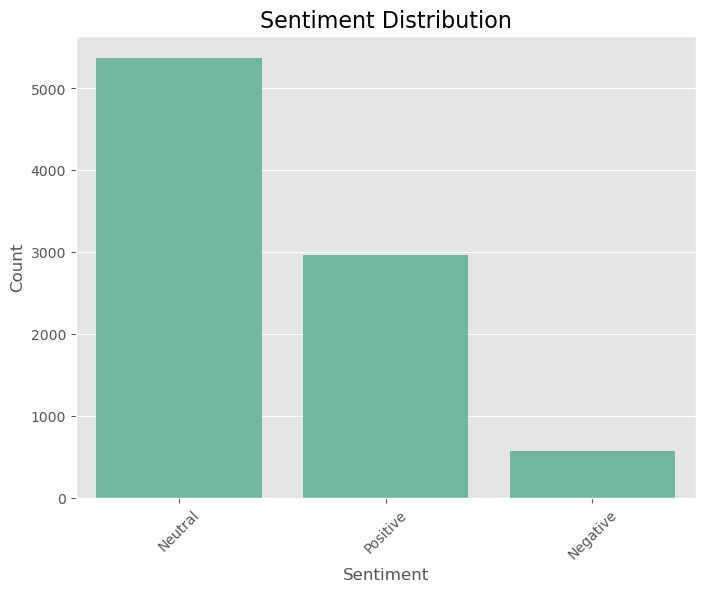

In [148]:
# Setting plot size and style
plt.figure(figsize=(8, 6))

# Plotting sentiment distribution using Seaborn's countplot
sns.countplot(x='Emotion', 
              data= data_cleaned, 
              order= data_cleaned['Emotion'].value_counts().index)

# Adding title and labels
plt.title('Sentiment Distribution', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

The sentiment distribution graph clearly shows that the dataset is imbalanced, with the majority of tweets labeled as `Neutral`, followed by `Positive emotion,` while `Negative emotion` labels has significantly fewer instances.

This imbalance is something we'll need to address during the modeling phase, potentially through techniques like resampling or adjusting class weights.

# 3. Data Preprocessing for NLP

## 3.1. Tokenization and Normalization

## 3.2. Stopwords Removal

## 3.3. Stemming and Lemmatization

## 3.4. Vectorization

## 3.5. Class Imbalance Handling (Optional)

# 4. Modeling

## 4.1. Model 1: Binary Classification (Positive vs. Negative)

### 4.1.1. Model Selection

### 4.1.2. Model Training

### 4.1.3. Model Evaluation

## 4.2. Model 2: Multiclass Classification (Positive, Negative, Neutral)

### 4.2.1. Model Selection

### 4.2.2. Hyperparameter Tuning

### 4.2.3. Model Evaluation

## 4.3. Advanced Models

### 4.3.1. Experiment with Word2Vec or GloVe embeddings

### 4.3.2. Use BERT for Sentiment Classification

### 4.3.3. Model Evaluation: (comparison with the simpler models above)

# 5. Model Explainability

## 5.1. SHAP or LIME Interpretation

Use SHAP or LIME to explain which features (words or n-grams) contributed most to model decisions.

- *Visualize and interpret feature importance for each sentiment class.*

# 6. Validation Strategy

## 6.1. Cross-Validation

## 6.2. Final Model Selection

# 7. Conclusion

## 7.1. Business Insights

## 7.2. Model Performance Overview

## 7.3. Future Work